1.- Enliste todas las librerias que utilizará 

In [643]:
# Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya 
# teniendo durante el desarrollo de la prueba

# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


2.- Importación y revisión de los datos 

In [644]:
# Importe ambos sets. Dado que la fuente de datos proviene de la misma base, 
# tienen las mismas columnas. Consolide ambos sets y reporte una 
# exploración básica de los datos (numero de filas/columnas, tipos de datos, 
# estadísticas básicas, casos perdidos)

# importar set de datos
df_2009 = pd.read_csv("2009_1perc.csv")
df_2010 = pd.read_csv("2010_1perc.csv")

In [645]:
print(df_2009.shape)
print(df_2010.shape)

(5812, 112)
(6013, 112)


In [646]:
# consolidar ambos sets
df_consolidado = pd.concat([df_2009, df_2010], axis=0)
df_consolidado.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [647]:
# numero de filas/columnas
df_consolidado.shape

(11825, 112)

In [648]:
# tipos de datos en el dataset
df_consolidado.dtypes

Unnamed: 0     int64
year           int64
pct            int64
ser_num        int64
datestop       int64
               ...  
xcoord        object
ycoord        object
dettypcm      object
linecm        object
detailcm      object
Length: 112, dtype: object

In [649]:
df_consolidado.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


In [650]:
# casos perdidos
df_consolidado.isnull().sum()

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64

3.- Preprocesamiento de datos 

In [651]:
# Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los 
# siguientes pasos para limpiar este set:

# 3.1 Obtenga una lista con todas las variables categoricas que tengan entre
# 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

# lista con variables categoricas con entre 2 y 99 categorias
variables_cat = [ 
    col for col in df_consolidado.columns  # por cada columna en el dataset
    if df_consolidado[col].dtype == 'object' # si el tipo de dato es object
    and df_consolidado[col].nunique() >= 2  # y el numero de categorias es mayor o igual a 2
    and df_consolidado[col].nunique() <= 99]  # y el numero de categorias es menor o igual a 99
variables_cat


['recstat',
 'inout',
 'trhsloc',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'sumissue',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'sex',
 'race',
 'haircolr',
 'eyecolor',
 'build',
 'addrtyp',
 'city',
 'sector',
 'beat',
 'dettypcm',
 'linecm']

In [652]:
# 3.2 Reemplaze las siguientes clases faltantes:
# -Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
# cambielo a 'N' y en caso contrario dejelo como 'Y'

df_consolidado["offverb"].fillna('N', inplace = True)
df_consolidado["offverb"].replace(" ", 'N', inplace = True)
df_consolidado["offverb"].replace("V", 'Y', inplace = True)
df_consolidado["offshld"].fillna('N', inplace = True)
df_consolidado["offshld"].replace(" ", 'N', inplace = True)
df_consolidado["offshld"].replace("S", 'Y', inplace = True)
df_consolidado["officrid"].fillna('N', inplace = True)
df_consolidado["officrid"].replace(" ", 'N', inplace = True)
df_consolidado["officrid"].replace("I", 'Y', inplace = True)



print(df_consolidado["offverb"].value_counts())
print(df_consolidado["offshld"].value_counts())
print(df_consolidado["officrid"].value_counts())


N    9246
Y    2579
Name: offverb, dtype: int64
N    8575
Y    3250
Name: offshld, dtype: int64
N    11664
Y      161
Name: officrid, dtype: int64


In [653]:
# -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, 
# dependiendo de como haya cargado la base de datos), cambielo a 'U' y en caso 
# contrario mantenga su valor
# Nota, los valores significan {N: No, Y: Yes, U: Unknown}

df_consolidado["sector"].fillna('U', inplace = True)
df_consolidado["sector"].replace(" ", 'U', inplace = True)

df_consolidado["trhsloc"].fillna('U', inplace = True)
df_consolidado["trhsloc"].replace(" ", 'U', inplace = True)

df_consolidado["beat"].fillna('U', inplace = True)
df_consolidado["beat"].replace(" ", 'U', inplace = True)

print(df_consolidado["sector"].value_counts())
print(df_consolidado["trhsloc"].value_counts())
print(df_consolidado["beat"].value_counts())




B    1175
A    1146
H    1124
E    1116
C    1095
G    1080
F    1021
D     914
I     872
J     684
K     397
M     342
U     293
P     228
N     148
T      79
Q      72
R      39
Name: sector, dtype: int64
P    8869
H    1859
T     892
U     205
Name: trhsloc, dtype: int64
U       7444
9        422
1        313
7        305
2        275
        ... 
  62       1
30         1
32         1
  61       1
  42       1
Name: beat, Length: 64, dtype: int64


In [654]:
# 3.3 Transforme las columnas ht_feet junto con ht_inch en una única 
# columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme 
# con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

df_consolidado["meters"] = (df_consolidado["ht_feet"] + df_consolidado["ht_inch"])*0.3048
# df_consolidado["meters"].head()
df_consolidado.shape


(11825, 113)

In [655]:
df_consolidado.columns

Index(['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop',
       'recstat', 'inout', 'trhsloc', 'perobs',
       ...
       'addrpct', 'sector', 'beat', 'post', 'xcoord', 'ycoord', 'dettypcm',
       'linecm', 'detailcm', 'meters'],
      dtype='object', length=113)

In [656]:
# 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna 
# datestop. Genere 2 nuevas columnas llamadas month y year que solo 
# tenga el mes y el año respectivamente

# Convertir la columna 'datestop' a tipo datetime
df_consolidado  ['datestop'] = pd.to_datetime(df_consolidado['datestop'], format='%m%d%Y')

# Obtener el mes y el año en columnas separadas
df_consolidado['month'] = df_consolidado['datestop'].dt.month
df_consolidado['year'] = df_consolidado['datestop'].dt.year

# Imprimir columna 'month' y 'year'
print(df_consolidado['month'].head(5))
print(df_consolidado['year'].head(5))



0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int64
0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int64


In [657]:
# 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 
# 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas 
# edades esten entre 18 y 100 años, ambos inclusive.

# Seleccionar columnas
df_consolidado = df_consolidado[variables_cat + ['month', 'year', 'meters', 'age']]
df_consolidado.shape

(11825, 78)

In [658]:
# Filtrar edades entre 18 y 100 años
df_consolidado = df_consolidado[(df_consolidado['age'] >= 18) & (df_consolidado['age'] <= 100)]
df_consolidado.shape

(10078, 78)

4.- Análisis exploratorio

<Axes: >

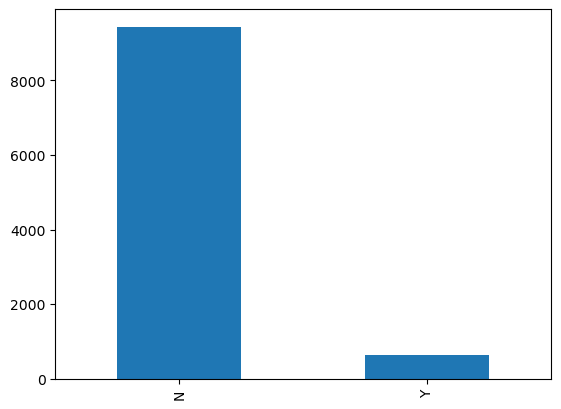

In [659]:
#  4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

# Gráfico de barras de la variable 'arstmade'
df_consolidado['arstmade'].value_counts().plot(kind='bar')

# Comentarios: La mayoría de los casos no terminan en arresto

In [660]:
#  4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

# tabla de contingencia
tabla_contingencia = pd.crosstab(df_consolidado['arstmade'], df_consolidado['race'])
tabla_contingencia

race,A,B,I,P,Q,U,W,Z
arstmade,,,,,,,,
N,279,5006,37,540,2368,66,902,234
Y,20,336,0,35,164,3,72,16


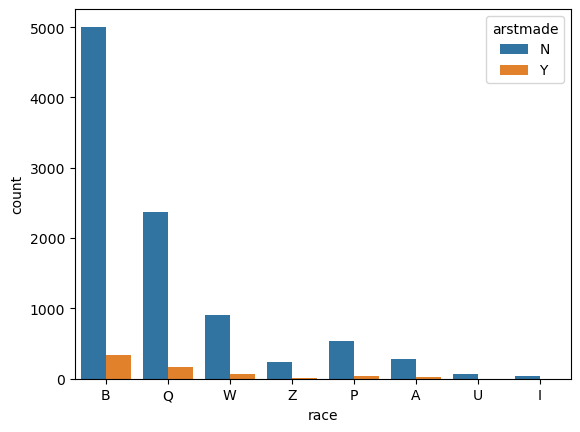

In [661]:
# grafico de barras 
sns.countplot(x='race', hue='arstmade', data=df_consolidado)
plt.show()

# comentario: la raza que más termina en arresto es la negra, pero 
# independiente de la raza, la mayoría de los casos no terminan en arresto.


In [662]:
# 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

# tabla de contingencia
tabla_conting_2 = pd.crosstab(df_consolidado['arstmade'], df_consolidado['sex'])
tabla_conting_2


sex,F,M,Z
arstmade,,,
N,586,8704,142
Y,64,574,8


In [663]:
df_consolidado['sex'].value_counts()

M    9278
F     650
Z     150
Name: sex, dtype: int64

In [664]:
# eliminar variable z en columna sex ya que no se sabe que significa
df_consolidado = df_consolidado.drop(df_consolidado[df_consolidado['sex'] == 'Z'].index)


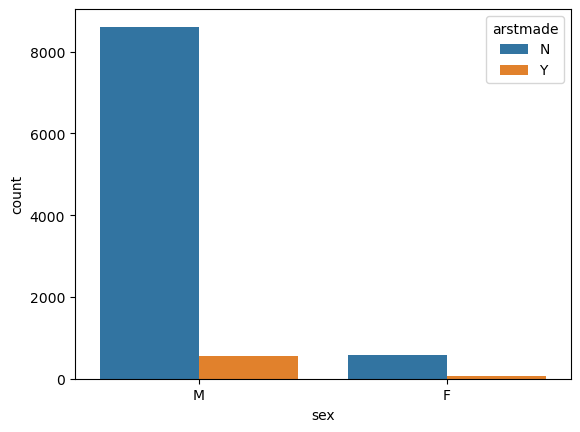

In [665]:
# grafico de barras
sns.countplot(x='sex', hue='arstmade', data=df_consolidado)
plt.show()

# comentario: la proporción de arrestos es mayor en hombres que en mujeres, 
# pero siguen siendo bajos los arestos en general.

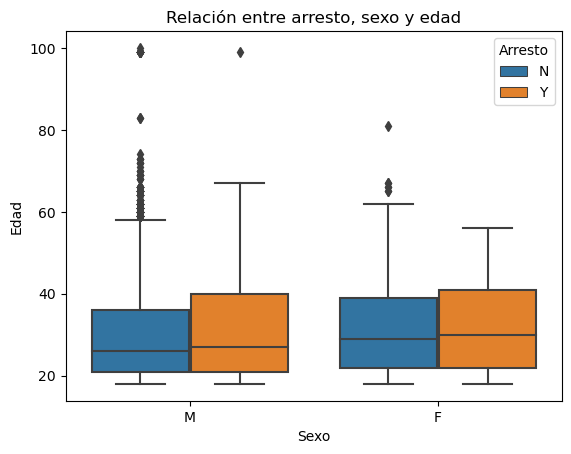

In [666]:
# 4.3 Estudie la relación de la variable respuesta en comportamiento con la 
# sexo y la edad en su conjunto, comente.

# Analizar la relación entre "arstmade", "sex" y "age"
sns.boxplot(x='sex', y='age', hue='arstmade', data=df_consolidado)
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.title('Relación entre arresto, sexo y edad')
plt.legend(title='Arresto')
plt.show()

# comentario: la mayor parte de los arrestos se dan en hombres entre 20 y 40 años, al igual que en mujeres.


In [667]:
# 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

# Recodificar la variable 'arstmade'
df_consolidado['arstmade'] = df_consolidado['arstmade'].replace({'N': 0, 'Y': 1})

# Imprimir la tabla de frecuencias de la variable 'arstmade'
print(df_consolidado['arstmade'].value_counts())


0    9187
1     629
Name: arstmade, dtype: int64


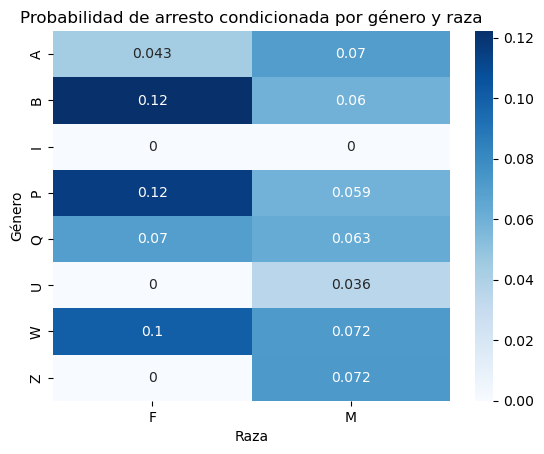

In [668]:
# 4.5 Muestre en un gráfico la probabilidad que un individuo sea 
# arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen 
# algunas conclusiones de lo que observa?.

# Analizar la probabilidad de arresto condicionada por género y raza
prob_arresto = df_consolidado.groupby(['race', 'sex'])['arstmade'].mean().unstack()

# Crear un mapa de calor
sns.heatmap(prob_arresto, annot=True, cmap='Blues')
plt.xlabel('Raza')
plt.ylabel('Género')
plt.title('Probabilidad de arresto condicionada por género y raza')
plt.show()


# conclusiones: la implicancia ética es que la probabilidad de arresto es mayor en hombres que en mujeres
# y en personas de raza negra que en personas de raza blanca.

5.- Determinar si el procedimiento policial concluirá en alguna acción violenta

In [669]:
# Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'], 
# ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican 
# si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la 
# marca 'Y'.
# Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de 
# las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje 
# de casos que terminaron con violencia.

# Crear la nueva variable 'violencia'
df_consolidado['violencia'] = df_consolidado[
    ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 
     'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']].apply(
         lambda row: 1 if 'Y' in row.values else 0, axis=1)

# Imprimir la tabla de frecuencias de la variable 'violencia'
print(df_consolidado['violencia'].value_counts())



0    7444
1    2372
Name: violencia, dtype: int64


In [670]:
# Calcular el porcentaje de casos con violencia
violence_percentage = (df_consolidado['violencia'].sum() / len(df_consolidado)) * 100
print(f"Porcentaje de casos con violencia: {violence_percentage:.2f}%")


Porcentaje de casos con violencia: 24.16%


6.- Modelación

In [671]:
# 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no 
# utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear 
# una variable a partir de otras!, además recuerde que creó una variable 
# numérica que es una categoría :) ). Luego genere los sets de train-test 
# utilizando el año 2009 para entrenar, y el año 2010 para testear. 

# get dummies
df_consolidado = pd.get_dummies(df_consolidado, drop_first=True)

# separar en train y test
df_train = df_consolidado[df_consolidado['year'] == 2009]
df_test = df_consolidado[df_consolidado['year'] == 2010]


In [672]:
#  6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.

# Separar la matriz de atributos y el vector objetivo
X_train = df_train.drop(['arstmade', 'year'], axis=1)
y_train = df_train['arstmade']

X_test = df_test.drop(['arstmade', 'year'], axis=1)
y_test = df_test['arstmade']

# escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [673]:
# modelo 1: regresión logística

# Entrenar un modelo de regresión logística
regresion = LogisticRegression()
regresion.fit(X_train, y_train)

LogisticRegression()

In [674]:
# Predecir en el set de entrenamiento
y_train_pred = regresion.predict(X_train)

# Predecir en el set de testeo
y_test_pred = regresion.predict(X_test)

# Calcular la métrica accuracy en el set de entrenamiento
print(f"Accuracy en el set de entrenamiento: {accuracy_score(y_train, y_train_pred):.3f}")

# calcular MSE del modelo de regresión logística
print(f"MSE en el set de entrenamiento: {mean_squared_error(y_train, y_train_pred):.3f}")


Accuracy en el set de entrenamiento: 0.974
MSE en el set de entrenamiento: 0.026


In [689]:
# modelo 2: random forest

# Entrenar un modelo de random forest
forest = RandomForestClassifier(max_depth=5, random_state=42)
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [690]:
# Predecir en el set de entrenamiento
y_train_pred = forest.predict(X_train)

# Predecir en el set de testeo
y_test_pred = forest.predict(X_test)

# Calcular la métrica accuracy en el set de entrenamiento
print(f"Accuracy en el set de entrenamiento: {accuracy_score(y_train, y_train_pred):.3f}")

# calcular MSE del modelo de random forest
print(f"MSE en el set de entrenamiento: {mean_squared_error(y_train, y_train_pred):.3f}")

Accuracy en el set de entrenamiento: 0.958
MSE en el set de entrenamiento: 0.042


In [677]:
# Conclusiones: el modelo de regresión logística tiene un accuracy mayor que el modelo de random forest
# y un MSE menor, por lo que es el mejor modelo.

In [678]:
# ¿Que puede hacer para mejorar la predicción de los modelos?

# Para mejorar la predicción de los modelos se puede realizar una búsqueda de hiperparámetros
# para encontrar los mejores parámetros para el modelo. 

# También se puede realizar una selección de atributos para quedarse con los atributos más importantes 
# y eliminar los que no aportan información.

